## Gaussian Mixture Model (GMM)

## True Data Generation

Select a Gaussian Mixture Model as the true probability density function for 2-dimensional real-valued data synthesis. This GMM will have 4 components with different mean vectors, different covariance matrices, and different probability for each Gaussian to be selected as the generator for each sample.

Generate two data sets with independent identically distributed samples using this true GMM; these datasets will have 100 and 10000 samples respectively.

In [18]:
#Import Libraries

import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt 

In [19]:
# Initialize model parameters

mean_array = np.array([[3, 0], [0, 3], [-1, -2], [1, 7]])
covariance_array = np.array([[[1, 0], [0, 1]],  [[1, 0], [0, 1.5]],  [[1, 0], [0, 0.5]],[[0.5, 0], [0, 1]]])
weights_array = np.array([0.25, 0.2, 0.32, 0.23])

In [20]:
# Data generation

def generating_data_from_mean_covariance_weights(number_data_pts, mean_arr, covariance_arr, weights_arr):
    data = []
    for i in range(number_data_pts):
        k = np.random.choice(len(weights_arr), 1, p=weights_arr)[0]
        x = np.random.multivariate_normal(mean_arr[k], covariance_arr[k])
        data.append(x)
    return data

In [21]:
# Generate data for 100 samples & 10000 samples

data_100_init = generating_data_from_mean_covariance_weights(100, mean_array, covariance_array, weights_array)
data_10000_init = generating_data_from_mean_covariance_weights(10000, mean_array, covariance_array, weights_array)

In [22]:
# Reshape data for visualization

array_data_100_init = np.array(data_100_init)
reshaped_data_100_init=np.reshape(array_data_100_init,(100,2))

array_data_10000_init = np.array(data_10000_init)
reshaped_data_10000_init=np.reshape(array_data_10000_init,(10000,2))

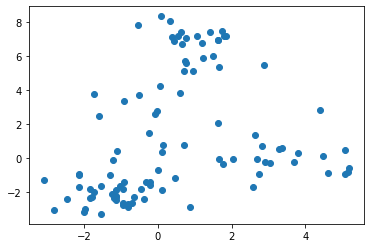

In [23]:
# 100 Data points

plt.scatter(reshaped_data_100_init[:, 0], reshaped_data_100_init[:,1], cmap='hot')
plt.show()

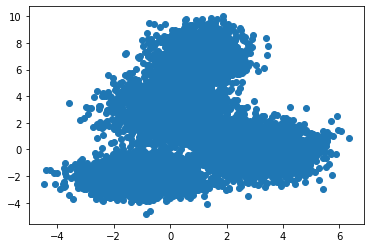

In [24]:
#10000 Data points

plt.scatter(reshaped_data_10000_init[:, 0], reshaped_data_10000_init[:,1], cmap='hot')
plt.show()

# Model Order Selection Using Cross-Validation
For each data set, using maximum likelihood parameter estimation principle (e.g. with the EM algorithm), within the framework of K-fold (e.g., 10-fold) cross-validation, evaluate GMMs with different model orders; specifically evaluate candidate GMMs with 1, 2, 3, 4, 5, 6, 7 Gaussian components. Note that both model parameter estimation and validation performance measures to be used is log-likelihood of data.

Repeat the experiment multiple times (e.g., at least 30 times) and report the results (tables/figures), indicating the rate at which each of the the seven GMM orders get selected for each of the datasets produced.

In [25]:
def log_sum_exp(Z):
    """ Compute log(\sum_i exp(Z_i)) for some array Z."""
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

In [26]:
# Calculate loglikehood

def loglikelihood(data, weights, means, covs):
    num_clusters = len(means)
    num_dim = len(data[0])
    ll = 0
    for d in data:
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
        ll += log_sum_exp(Z)
    return ll

In [27]:
# Calculate Average LogLikelihood for 100 data points

max_cluster_log_likelihood_100 =[]
for i in range(30):
    k = 10
    kf = KFold(n_splits=k, random_state=None)
    avg_log_likelihood =[]
    log_likelihood_array_1 = []
    log_likelihood_array_2 = []
    log_likelihood_array_3 = []
    log_likelihood_array_4 = []
    log_likelihood_array_5 = []
    log_likelihood_array_6 = []
    log_likelihood_array_7 = []
    for train_index_array,test_index_array in kf.split(array_data_100_init):
        train_data = []
        for train_index in train_index_array:
            train_data.append(array_data_100_init[train_index])
        test_data = []
        for test_index in test_index_array:
            test_data.append(array_data_100_init[test_index])
        gm_1 = GaussianMixture(n_components=1, random_state=None).fit(train_data)
        curr_log_likelihood = gm_1.score(test_data)
        log_likelihood_array_1.append(curr_log_likelihood)
        gm_2 = GaussianMixture(n_components=2, random_state=None).fit(train_data)
        curr_log_likelihood = gm_2.score(test_data)
        log_likelihood_array_2.append(curr_log_likelihood)
        gm_3 = GaussianMixture(n_components=3, random_state=None).fit(train_data)
        curr_log_likelihood = gm_3.score(test_data)
        log_likelihood_array_3.append(curr_log_likelihood)
        gm_4 = GaussianMixture(n_components=4, random_state=None).fit(train_data)
        curr_log_likelihood = gm_4.score(test_data)
        log_likelihood_array_4.append(curr_log_likelihood)
        gm_5 = GaussianMixture(n_components=5, random_state=None).fit(train_data)
        curr_log_likelihood = gm_5.score(test_data)
        log_likelihood_array_5.append(curr_log_likelihood)
        gm_6 = GaussianMixture(n_components=6, random_state=None).fit(train_data)
        curr_log_likelihood = gm_6.score(test_data)
        log_likelihood_array_6.append(curr_log_likelihood)
        gm_7 = GaussianMixture(n_components=7, random_state=None).fit(train_data)
        curr_log_likelihood = gm_7.score(test_data)
        log_likelihood_array_7.append(curr_log_likelihood)
    avg_log_likelihood.append(np.mean(log_likelihood_array_1))
    avg_log_likelihood.append(np.mean(log_likelihood_array_2))
    avg_log_likelihood.append(np.mean(log_likelihood_array_3))
    avg_log_likelihood.append(np.mean(log_likelihood_array_4))
    avg_log_likelihood.append(np.mean(log_likelihood_array_5))
    avg_log_likelihood.append(np.mean(log_likelihood_array_6))
    avg_log_likelihood.append(np.mean(log_likelihood_array_7))
    j = avg_log_likelihood.index(max(avg_log_likelihood))
    max_cluster_log_likelihood_100.append(j+1)
max_cluster_log_likelihood_100

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

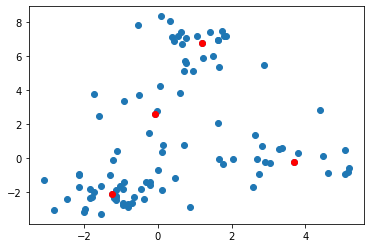

In [28]:
import scipy.stats
X = reshaped_data_100_init
plt.scatter(X[:,0], X[:, 1], cmap='hot')
gmm = GaussianMixture(n_components=4).fit(X)
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')
plt.show()

In [29]:
# Calculate Average LogLikelihood for 10000 data points

max_cluster_log_likelihood_10000 =[]
for i in range(30):
    k = 10
    kf = KFold(n_splits=k, random_state=None)
    avg_log_likelihood =[]
    log_likelihood_array_1 = []
    log_likelihood_array_2 = []
    log_likelihood_array_3 = []
    log_likelihood_array_4 = []
    log_likelihood_array_5 = []
    log_likelihood_array_6 = []
    log_likelihood_array_7 = []
    for train_index_array,test_index_array in kf.split(array_data_10000_init):
        train_data = []
        for train_index in train_index_array:
            train_data.append(array_data_10000_init[train_index])
        test_data = []
        for test_index in test_index_array:
            test_data.append(array_data_10000_init[test_index])
        gm_1 = GaussianMixture(n_components=1, random_state=None).fit(train_data)
        curr_log_likelihood = gm_1.score(test_data)
        log_likelihood_array_1.append(curr_log_likelihood)
        gm_2 = GaussianMixture(n_components=2, random_state=None).fit(train_data)
        curr_log_likelihood = gm_2.score(test_data)
        log_likelihood_array_2.append(curr_log_likelihood)
        gm_3 = GaussianMixture(n_components=3, random_state=None).fit(train_data)
        curr_log_likelihood = gm_3.score(test_data)
        log_likelihood_array_3.append(curr_log_likelihood)
        gm_4 = GaussianMixture(n_components=4, random_state=None).fit(train_data)
        curr_log_likelihood = gm_4.score(test_data)
        log_likelihood_array_4.append(curr_log_likelihood)
        gm_5 = GaussianMixture(n_components=5, random_state=None).fit(train_data)
        curr_log_likelihood = gm_5.score(test_data)
        log_likelihood_array_5.append(curr_log_likelihood)
        gm_6 = GaussianMixture(n_components=6, random_state=None).fit(train_data)
        curr_log_likelihood = gm_6.score(test_data)
        log_likelihood_array_6.append(curr_log_likelihood)
        gm_7 = GaussianMixture(n_components=7, random_state=None).fit(train_data)
        curr_log_likelihood = gm_7.score(test_data)
        log_likelihood_array_7.append(curr_log_likelihood)
    avg_log_likelihood.append(np.mean(log_likelihood_array_1))
    avg_log_likelihood.append(np.mean(log_likelihood_array_2))
    avg_log_likelihood.append(np.mean(log_likelihood_array_3))
    avg_log_likelihood.append(np.mean(log_likelihood_array_4))
    avg_log_likelihood.append(np.mean(log_likelihood_array_5))
    avg_log_likelihood.append(np.mean(log_likelihood_array_6))
    avg_log_likelihood.append(np.mean(log_likelihood_array_7))
    j = avg_log_likelihood.index(max(avg_log_likelihood))
    max_cluster_log_likelihood_10000.append(j+1)
max_cluster_log_likelihood_10000

[5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

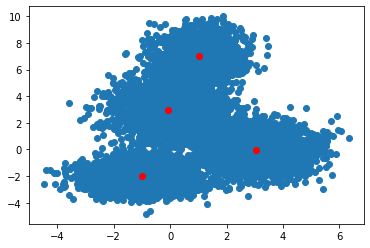

In [30]:
import scipy.stats
X = reshaped_data_10000_init
plt.scatter(X[:,0], X[:, 1], cmap = 'hot')
gmm = GaussianMixture(n_components=4).fit(X)
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')
plt.show()

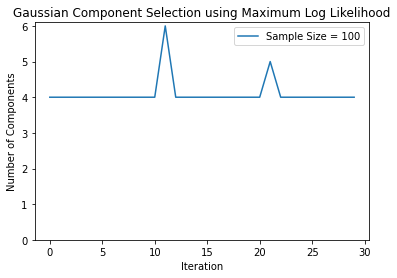

In [31]:
# Select Gaussian Component using Maximum Likelihood for 100 data points

plt.plot(range(len(max_cluster_log_likelihood_100)),max_cluster_log_likelihood_100, label='Sample Size = 100')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 7, 1.0))
plt.ylabel('Number of Components')
plt.title('Gaussian Component Selection using Maximum Log Likelihood')
plt.legend();

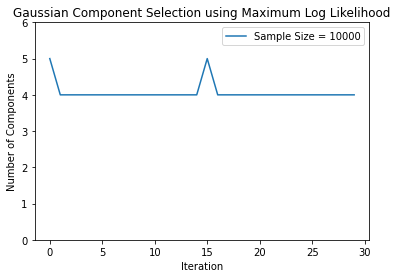

In [32]:
# Select Gaussian Component using Maximum Likelihood for 10000 data points

plt.plot(range(len(max_cluster_log_likelihood_10000)),max_cluster_log_likelihood_10000, label='Sample Size = 10000')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 7, 1.0))
plt.ylabel('Number of Components')
plt.title('Gaussian Component Selection using Maximum Log Likelihood')
plt.legend();